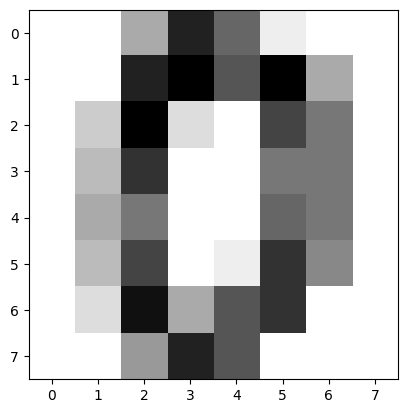

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [2]:
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
data, digits.target, test_size=0.2)

In [4]:
# -----------------------------
# 2) 모델 구성
# -----------------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
lr = LogisticRegression(max_iter=500)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

In [6]:
# -----------------------------
# 3) 모델 학습
# -----------------------------

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [7]:
# -----------------------------
# 4) 예측결과 생성
# -----------------------------

dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)
lr_y_pred = lr.predict(X_test)

In [8]:
knn_y_pred = knn.predict(X_test)

scores = metrics.accuracy_score(y_test, knn_y_pred)
print(scores)

0.9722222222222222


[5]


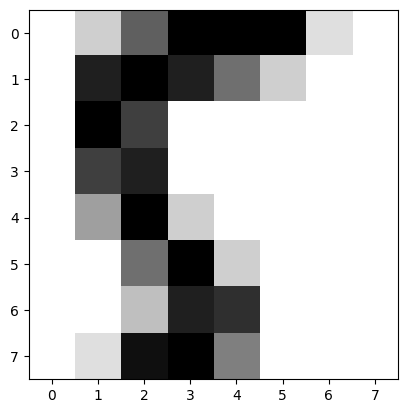

In [9]:
plt.imshow(X_test[10].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

y_pred = knn.predict([X_test[10]]) # 입력은 항상 2차원 행렬이어야 한다.
print(y_pred)

In [10]:
# -----------------------------
# 5) 예측결과와 정답을 비교한 정확도 평가
# -----------------------------

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dt_acc = accuracy_score(y_test, dt_y_pred)
rf_acc = accuracy_score(y_test, rf_y_pred )
lr_acc = accuracy_score(y_test, lr_y_pred)


print("=== DT Test Accuracy ===")
print(f"Decision Tree : {dt_acc:.4f}")
print (confusion_matrix(y_test,dt_y_pred))

print("=== RF Test Accuracy ===")
print(f"Random Forest : {rf_acc:.4f}")
print (confusion_matrix(y_test,rf_y_pred))

print("=== LR Test Accuracy ===")
print(f"Logistic Reg. : {lr_acc:.4f}")
print (confusion_matrix(y_test,lr_y_pred))

=== DT Test Accuracy ===
Decision Tree : 0.8472
[[34  0  0  0  0  0  0  1  0  0]
 [ 0 34  1  0  1  0  0  0  1  0]
 [ 1  2 29  2  0  0  1  0  1  0]
 [ 0  0  1 36  0  1  1  0  2  5]
 [ 0  0  0  1 20  1  1  0  1  0]
 [ 0  0  0  1  0 34  2  0  0  3]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  1  0  1  0  1 26  0  1]
 [ 1  0  2  2  0  2  0  0 26  3]
 [ 0  3  0  1  0  1  0  3  2 31]]
=== RF Test Accuracy ===
Random Forest : 0.9611
[[35  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  1  0 42  0  1  0  1  0  1]
 [ 0  0  0  0 23  0  0  1  0  0]
 [ 0  0  0  0  0 37  1  0  0  2]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  1]
 [ 0  1  1  0  0  0  0  0 33  1]
 [ 0  0  0  0  0  0  0  1  1 39]]
=== LR Test Accuracy ===
Logistic Reg. : 0.9611
[[35  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  1  0]
 [ 0  1  0  0 22  0  0  0  0  1]
 [ 0  0  0  0  0 35  1  0  1 

In [11]:
knn_acc = accuracy_score(y_test, knn_y_pred)

print("=== KNN Test Accuracy ===")
print(f"KNeighborsClassifier : {knn_acc:.4f}")
print (confusion_matrix(y_test, knn_y_pred))

=== KNN Test Accuracy ===
KNeighborsClassifier : 0.9722
[[35  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  1  0  0  0  0]
 [ 0  1  0  0 22  0  0  1  0  0]
 [ 0  0  0  0  0 38  1  0  0  1]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  2  0  0  0  0  0  0 34  0]
 [ 0  0  0  1  1  0  0  0  1 38]]


In [12]:
print(f"{metrics.classification_report(y_test, knn_y_pred)}\n")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.93      1.00      0.96        37
           2       1.00      1.00      1.00        36
           3       0.98      0.98      0.98        46
           4       0.96      0.92      0.94        24
           5       0.97      0.95      0.96        40
           6       0.97      1.00      0.99        35
           7       0.97      1.00      0.98        30
           8       0.97      0.94      0.96        36
           9       0.97      0.93      0.95        41

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360


